Dataset: ANSUR II Female <br>

By Ida Johanne Austad <br>

 <br>

In general, dimension reduction techniques are applied when we have a lot of features in our dataset. Having too many features can cause problems, for instance overfitting. Also, including features in our analysis which will not provide us any or little information about the variablility in a dependant variable is unnecessary and can complicate the analysis of our results. The goal of dimension reduction techniqies is thus to find a low-dimensional representation of our data which still contains most of the information about our data. <br>

# General description of each selected technique:

## Principal Component Analysis (PCA) 
PCA is an unsupervised method for dimension reduction, meaning that it does not need labeled data to be applied. What we want to do when applying PCA is to reduce the dimensions in a nxp matrix (where n is the number of observations, and p is the number of original features). What PCA does is that is allows us to define a new set of features, which are linear combinations of our original features, and which explains most of the variability in the original features. The new features are called the Principal Components. The Principal Components are extracted in such a way that the first linear component will take the direction through our observations/data points in which they vary the most. That is, if we drew a line through the data we would want to draw the line which is "closest" to the data points, so that if we projected the points onto the line the sum of squared perpendicular distances between each point and the line is minimized. As additional principal components are extracted they will try to capture as much of the remaining variance as possible by creating new linear combinations of the features that are uncorrelated with the previously extracted components (that is, each new principal components direction has to be perpendicular to the previous ones). One can extract up to p principal components. However, the goal is to be able to reduce the number of features we need, so it is common to "stop" when the extracted principal components captures a sufficiently large amount of the variance in the data [1].  <br>

## Factor Analysis (FA)
The Factor Analysis method assumes that there are latent variables (aka Factors) "hidden" behind our original features. Typically these would be things which are hard to measure directly by themselves (which is common in studies in many fields such as Psychology, Macroeconomics etc.). Each of these factors affects our features. That is, the (inter)variability in our original features can be explained by a set of (underlying) factors. FA classifies the variance in our original features in three types: common variance, unique variance and error variance. The common variance is variance which is shared between our features, and will as such "capture" how correlated our features are. Unique variance is the portion of the variance which is not shared with the other features. The error variance is the error which can occur when collecting the observation (measurements, human errors etc.). What factor analysis does is to extract or estimate the factors so that they explain as much of the common variance between our original features as possible. We can create as many factors as we have original variables, but the factors that do not explain a lot of common variance are typically left out, and we are left with a smaller number of factors than our original features - which is the goal [2,3]. <br>

# Import data

In [1]:
#import libraries 
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# choose to work on the dataset on females
df = pd.read_csv('./ANSUR_II_FEMALE_Public.csv', encoding='latin-1')

In [3]:
#look at data
df.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [4]:
df.shape

(1986, 108)

# Selecting features

For this coursework we can imagine that we wanted to build a model to predict weight, and based on this we can select a subset of our features to whom we will apply the chosen dimension reduction techniques on, although we won't actually build a model in the end here. There are two variables in the dataset which describe a persons weight (in kg or lbs) - lbs has been chosen here.

When selecting features it was interesting to select a subset of features which had a varying degree of correlation with each other and with the dependent variable. Based on playing with the code below, a subset of the features was chosen based on this rationale.

In [5]:
#check which the features which have the strong correlation with weightlbs
correlation = df.corr()['Weightlbs']

# Make a list of the features which have a correlation with absolute value larger 
# than a certain value (here 0.85)
features_list = correlation[abs(correlation) > 0.85].sort_values(ascending=False)
print("There is {} values which have a correlation with Weight > 0.85:\n{}"
      .format(len(features_list), round(features_list,2)))

There is 4 values which have a correlation with Weight > 0.85:
Weightlbs               1.00
weightkg                0.97
buttockcircumference    0.88
thighcircumference      0.86
Name: Weightlbs, dtype: float64


In [6]:
#check which the features which have the low (here 0.2) correlation with weightlbs
features_list = correlation[abs(correlation) < 0.2].sort_values(ascending=False)
print("There is {} values which have a correlation with Weight < 0.2:\n{}"
      .format(len(features_list), round(features_list,2)))

There is 6 values which have a correlation with Weight < 0.2:
earbreadth            0.17
elbowrestheight       0.14
SubjectNumericRace    0.05
earprotrusion         0.01
SubjectId            -0.01
DODRace              -0.07
Name: Weightlbs, dtype: float64


In [7]:
# 8 selected features for dimension reduction: 
# buttockcircumference, hipbreadth, waistcircumference, 
# wristheight , earbreadth, interpupillarybreadth, Heightin

# We also include the Weightlbs here to investigate the correlation further

selected_features = ["Weightlbs","buttockcircumference", "hipbreadth", 
                     "waistcircumference", "Heightin", "footlength", 
                     "wristheight", "earbreadth", "interpupillarybreadth"]
df_selected = df[selected_features]
df_selected.head()

,Weightlbs,buttockcircumference,hipbreadth,waistcircumference,Heightin,footlength,wristheight,earbreadth,interpupillarybreadth
0,142,1011,345,850,61,246,756,35,645
1,120,893,315,708,64,249,815,32,595
2,147,987,356,727,68,265,799,36,655
3,175,1012,337,923,66,265,818,38,655
4,195,1281,448,1163,63,247,762,34,635


In [8]:
#check for null values
df_selected.isnull().sum().max()

0

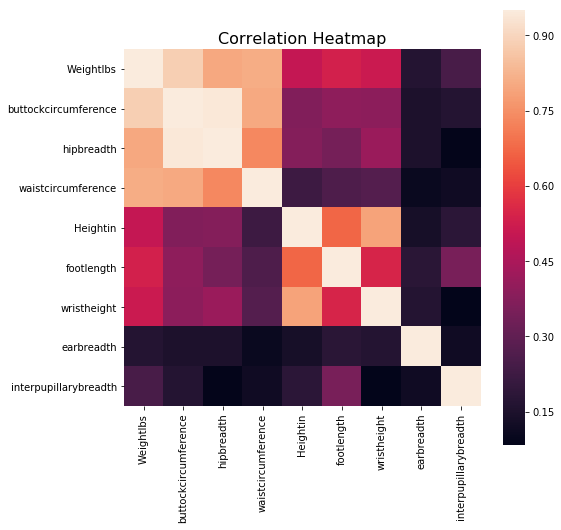

In [9]:
#get an overview of the correlation with a heatmap
correlation = df_selected.corr()
f , ax = plt.subplots(figsize = (8,8)) 
plt.title('Correlation Heatmap',y=1 ,size=16) 
sns.heatmap(correlation, square = True, vmax=0.95)

As we can see from the heatmap above, the chosen features vary in how much they correlate with the dependant variable and with each other.  

In [10]:
#for the selected techniques to work/be meaningful, 
#there should be some variance in the features. We thus check for this.
df_selected.describe().loc[["std"]]

,Weightlbs,buttockcircumference,hipbreadth,waistcircumference,Heightin,footlength,wristheight,earbreadth,interpupillarybreadth
std,22.855371,75.894711,26.669685,99.931771,2.801938,12.435535,38.194755,2.770012,36.217662


We see that all the selected features have a standard deviation of a notable size. If they did not, they would not provide us with any information - and would thus not be necessary to include. 

# Preprocessing 

As the techniques we are to apply for dimension reduction work better with data which has a multivariate normal distribution we check for this.

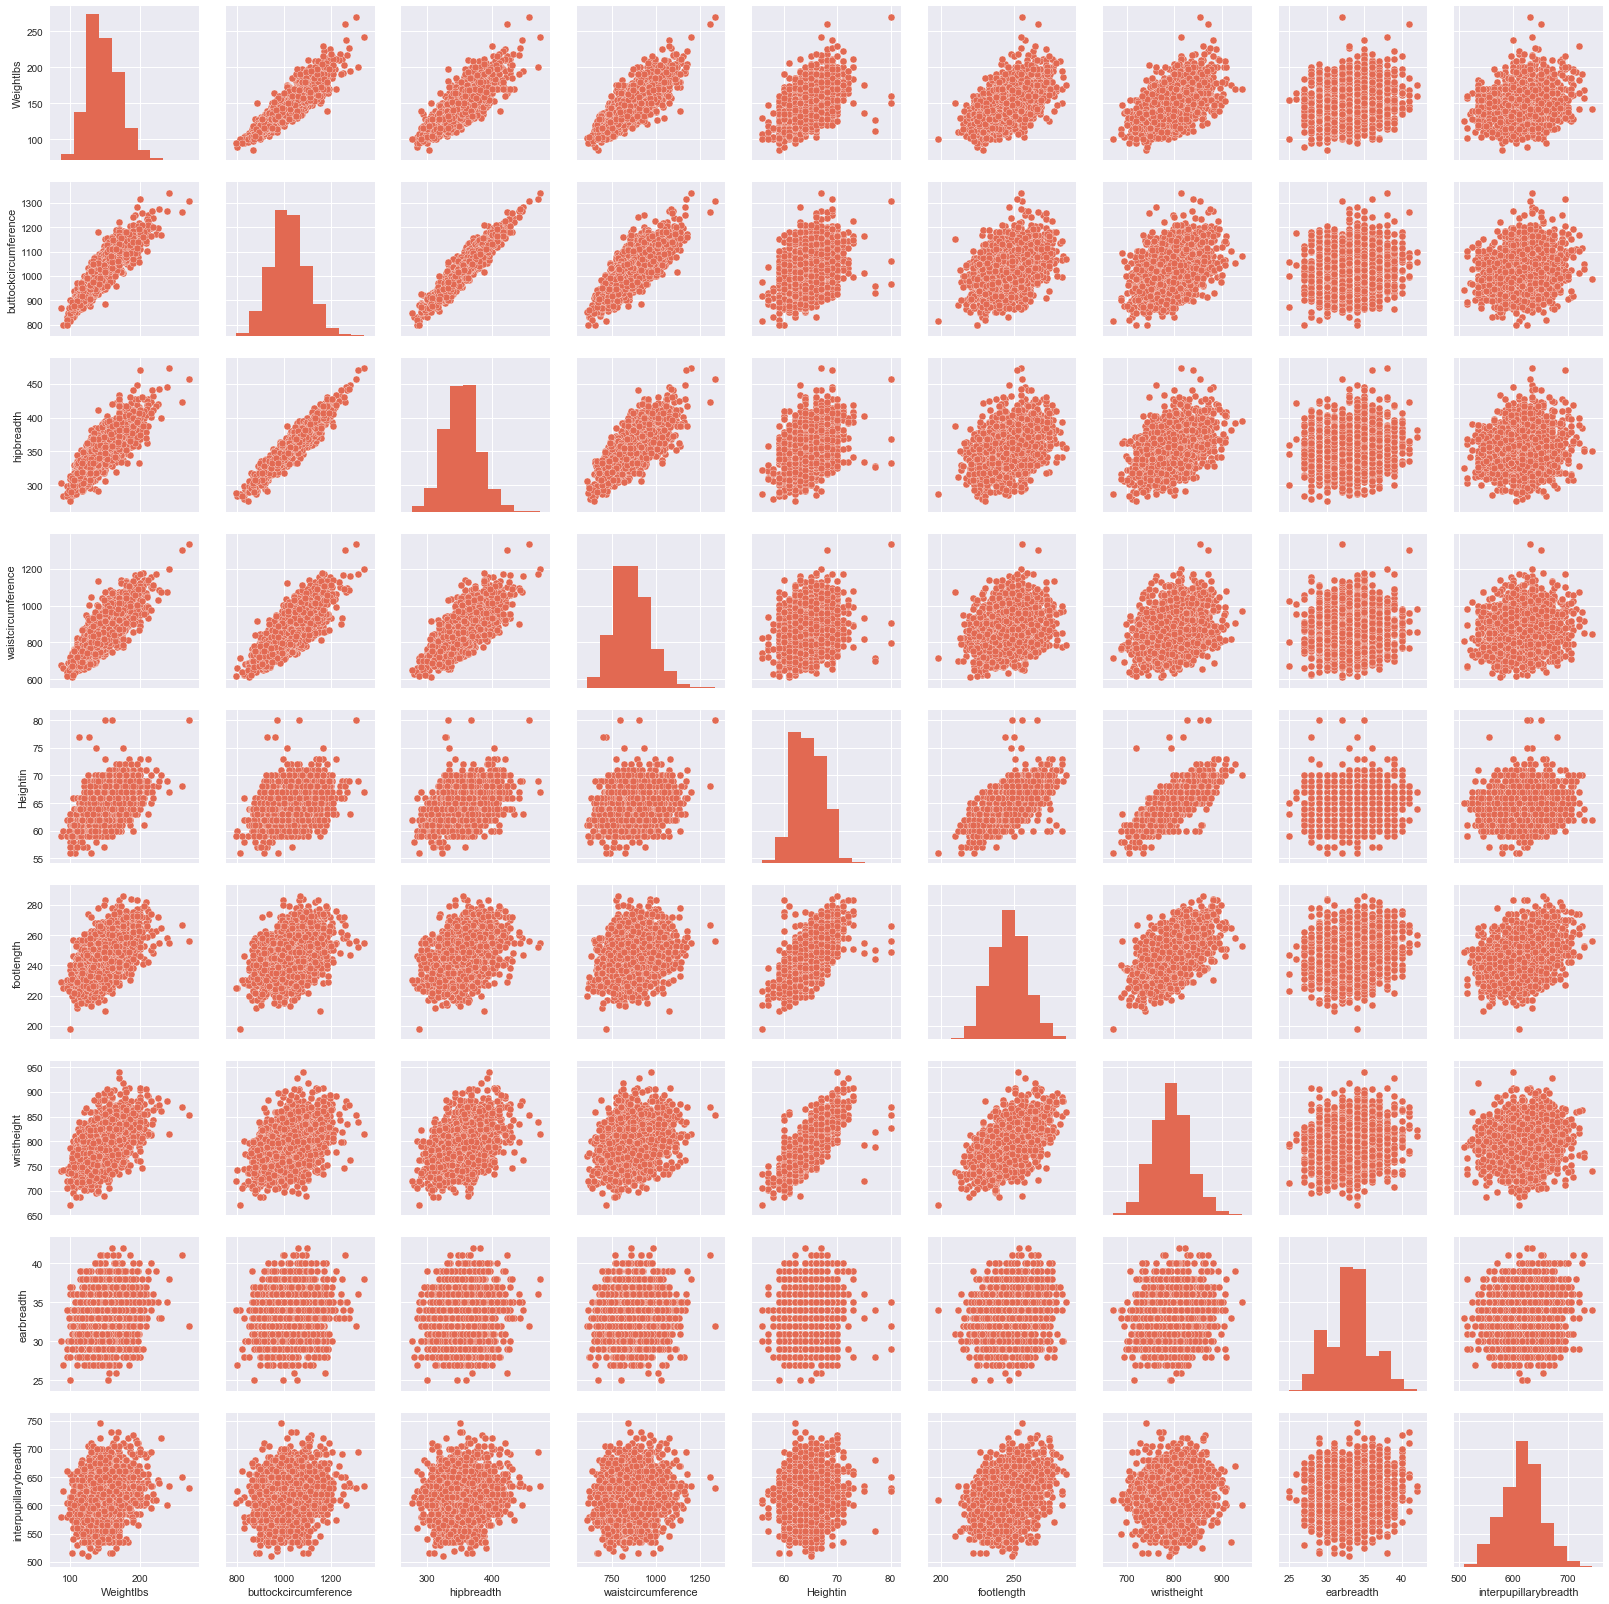

In [11]:
#pairplot to investigate if the features have a multivariate normal distribution
sns.set()
sns.set_palette("coolwarm_r")
sns.pairplot(df_selected)
plt.show()

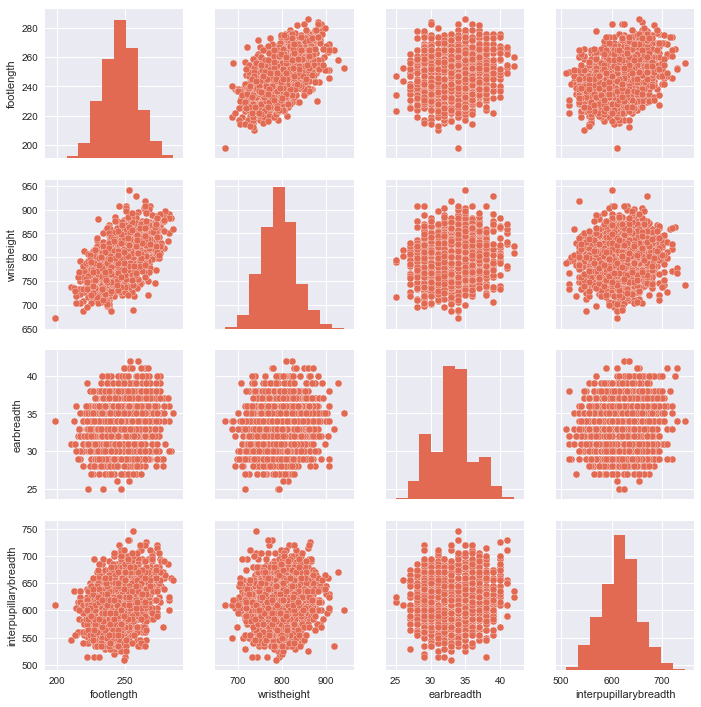

In [12]:
#Take a closer look at a section of the pairplot
sns.set()
sns.set_palette("coolwarm_r")
sns.pairplot(df_selected[df_selected.columns[5:]])
plt.show()

As there are many features the upper pairplot is a bit hard to read here, but the second pairplot shows how one can zoom in on different parts of the total picture and get a closer view. Based on the pairplots above which plots all our features against each other we see that all of the scatterplots shows a shape very close to that of an ellipse.  Some are closer to circular, while others are more elongated. Based on this we can conclude that the data has a distribution close to normal. <br>

Before applying the dimension reduction techniques we standardize the data. This is done as the features might be measured in different scales or units. A quick look at the description of the data [4] does not make it immedeately evident whether the measures are reported in the same units (e.g. cm or inch), although this could be resonable to believe.

In [13]:
features = ["buttockcircumference", "hipbreadth", "waistcircumference", "Heightin", 
            "footlength", "wristheight", "earbreadth", "interpupillarybreadth"]

# create numpy array and standardize
x = StandardScaler().fit_transform(df_selected.loc[:, features].values)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# PCA

The following section shows how to perform PCA for dimension reduction on our selected features and how to evaluate the results and choose which Principal Components to move forward with. Choose to specify number of components (n_components) to be 8  to see the contributions of each component up to the point where the number is equal to the number of original features, and as such evaluate how many components one would choose to move forward with if we were to build a model.

In [25]:
#perform pca
pca = PCA(n_components=8)
pca.fit(x)

# print variance explained by each principal component
print(np.round(pca.explained_variance_,4))

[3.6448 1.5193 1.0267 0.9102 0.3959 0.2797 0.1818 0.0455]


As expected we see that the first principal component explains the most variance, and that the amount of variance explained decreases for each component. These values also represent the eigenvalues of each component, which we will use later [6]. We continue by visualizing this in a barplot, but using ratio.

Text(0.5,1,'Proportion explained variance per Principal Component')

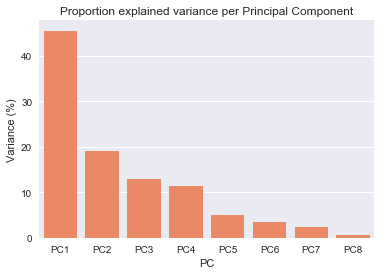

In [15]:
#barplot with % variance explained by each PC in descending order
ratio_var = pd.DataFrame({'Variance (%)':(pca.explained_variance_ratio_*100)
                          ,'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8']})
sns.barplot(x='PC',y="Variance (%)", data=ratio_var, color="coral")
plt.title('Proportion explained variance per Principal Component')

Text(0.5,1,'Cumulated explained variance by number of Principal Components')

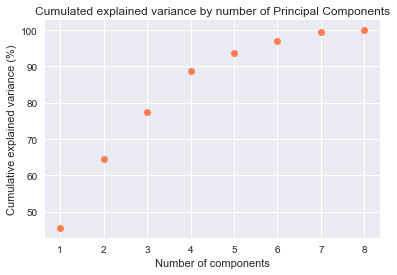

In [16]:
# get cumulated % variance for plotting
var_cumulated=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.plot(range(1,9),var_cumulated, marker = "o", linestyle="", color="coral")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance (%)')
plt.title('Cumulated explained variance by number of Principal Components')

The plot above shows us how for each Principal Component we include, how large percentage of the variance can be explained. We observe that already at 4 components almost 90% of the variance is explained. <br>

## Evaluation of PCA results

Overall, we see that the results from the PCA is promising in terms of reducing the number of features we could use in a further analysis. We see this by the fact that we can include a number of the new Principal Components in our further process, which is lower than the original number of features - without loosing too much information.<br>
There are several suggested ways to decide how many Principal Components to move forward with [7,8]: <br>
<br>

 - One is to choose all the PCs with an eigenvalue above 1. The rationale being that those PCs which have a eigenvalue above 1 explains more than 1 feature in our original dataset. By looking at the output from pca.explained_variance_ above, this strategy suggests that we choose PC 1-3. <br>
 - A second strategy is to look at so called Scree plot (a plot of the eigenvalues as given by pca.explained_variance_), and discard all the components which come after the plot starts leveling off. We do the same evaluation by looking at the plot above "Proportion explained variance per Principal Component". This strategy would suggest that we also include PC4, as it is not until we get to PC5 that the plot levels out. <br>
 - A third way is to look at the accumulated variance explained, as in the last plot before this section, and choose the number of component which explains a certain percentage of the total variance, for instance 90%. If this strategy is chosen we would have to choose PC 1-5. However, PC4 seems to be just below 90% so one might argue that  this is sufficient, expecially since the slope seems to starts getting much smaller after PC4, meaning that the additional explained variance per added PC is becoming rather small <br>
 <br>

All in all, based on the Principal Component Analysis performed above one could argue that moving forward with 4 Principal Components for further model building is meaningful. As such the method has been successful in reducing the dimensions of our dataset, from 8 to 4 features.

# Factor Analysis

The following section shows how to perform FA for dimension reduction on our selected features. Chose to use the package factor_analyzer [5] as this supports varimax rotation, to meet the issue of the inability to uniquely determine the factors. The assumption of multivariate normality has been verified above. Choose to specify K = 8 (K: number of factors) to see the contributions of each factor up to the point where the number is equal to the number of original features.

In [17]:
from factor_analyzer import FactorAnalyzer

#as .analyze function takes a pandas dataframe as input we have to create this
fa_x = df_selected.loc[:, features]
fa_x = pd.DataFrame(StandardScaler().fit_transform(fa_x), columns = features)

In [18]:
#perfrom factor analysis with varimax rotation and get factor loadings
fa = FactorAnalyzer()
fa.analyze(fa_x, 8, rotation="varimax")
np.round(fa.loadings,4)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
buttockcircumference,0.9581,0.1961,0.1546,0.1134,0.0275,0.0257,0.0202,0.0
hipbreadth,0.9100,0.2342,0.0029,0.1694,0.1661,0.0246,-0.0104,0.0
waistcircumference,0.7987,0.0940,0.1081,0.0618,-0.1487,-0.0248,-0.0083,0.0
Heightin,0.1546,0.9058,0.2084,0.0456,0.0821,-0.0238,-0.0034,0.0
footlength,0.1851,0.5815,0.5269,0.1507,0.0384,0.1335,0.0005,0.0
wristheight,0.2136,0.8365,-0.0236,0.2336,-0.0878,-0.0034,0.0036,0.0
earbreadth,0.0796,0.0911,0.1210,0.3181,0.0009,0.0019,0.0000,0.0
interpupillarybreadth,0.0567,0.0621,0.5421,0.1347,-0.0056,-0.0159,0.0001,0.0


The entries in the table above represent weights or factor loadings. They describe the relationship between the original features (rows) and each of the latent factors (columns). That is, it describes how each factor affects the original feature. They vary between 1 and -1, and the closer they are to 1 or -1 the more a factor affects the original feature. If the loading is 0 it means no effect. We observe that overall the relationship between the original features and the factors decrease as we move to the right in the table (from Factor 1 towards Factor 8). Still, for some of the features the relationship varies as we move to the right in the table, as some have a stronger relationship with one of the "later" Factors than the first one. For factor 8, all loadings are 0. Based on this we can see that the different Factors vary in how much of the common variance they explain. As we move to the right in the table, the factors explain less and less common variance. 

In [19]:
# We can then move on to get a clearer view of how much of the common 
# variance each Factor explains
np.round(fa.get_factor_variance(),4)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8
SS Loadings,2.4974,1.9728,0.6657,0.2440,0.0664,0.0205,0.0006,0.0000
Proportion Var,0.3122,0.2466,0.0832,0.0305,0.0083,0.0026,0.0001,0.0000
Cumulative Var,0.3122,0.5588,0.6420,0.6725,0.6808,0.6833,0.6834,0.6834


In [20]:
# We wan also look at how much of the variance 
# is not explained by the factors
np.round(fa.get_uniqueness(),4)

,Uniqueness
buttockcircumference,0.0050
hipbreadth,0.0601
waistcircumference,0.3149
Heightin,0.1027
footlength,0.3079
wristheight,0.1918
earbreadth,0.8696
interpupillarybreadth,0.6806


In [21]:
# To illustrate how the uniqueness function gives us the remaining unexplained 
# variance we can do the following calculations:

a = np.sum(fa.get_uniqueness().values)                            
b = np.sum(fa.get_factor_variance().iloc[[0]].values[0])
c = a + b
print("The proportion of total unexplained variance: " + str(round(a/c,4)))
print("The proportion of total explained variance: " + str(round(b/c,4)))

The proportion of total unexplained variance: 0.3166
The proportion of total explained variance: 0.6834


From the output just above we see that the amount of explained variance (0.683) corresponds to the cumulated variance (Cumulated Var) given by fa.get_factor_variance(). As such the output from FA is different from that of PCA because FA works differently and only captures common variance in their Factors. Leaving some variance left as either unique to the original features or as error. Therefore, we cannot directly compare the cumulated variance given by FA and PCA. <br>

The techniques used to evaluate how many Factors to include in further analysis are the same as for PCA [7.8]. We thus proceed creating equivalent visualizations for our factors as we did for the Principal Components.

In [22]:
#get the common factor eigenvalues (v)
ev, v = fa.get_eigenvalues()
print(round(v,4))

   Common_Factor_Eigenvalues
0                     3.4792
1                     1.3380
2                     0.4648
3                     0.1064
4                     0.0649
5                     0.0134
6                     0.0006
7                    -0.0000


Text(0.5,1,'Scree Plot')

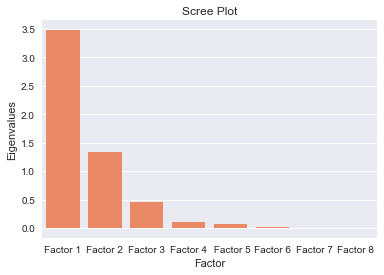

In [23]:
#We plot a Scree plot of the Common Factor Eigenvalues of each factor
var_fa = pd.DataFrame({'Eigenvalues':v["Common_Factor_Eigenvalues"].values,
                       'Factor':['Factor 1','Factor 2',
                                 'Factor 3','Factor 4',' Factor 5',
                                 'Factor 6','Factor 7', 'Factor 8']})
sns.barplot(x='Factor',y="Eigenvalues", data=var_fa, color="coral")
plt.title('Scree Plot')

Text(0.5,1,'Cumulated explained variance by number of Factors')

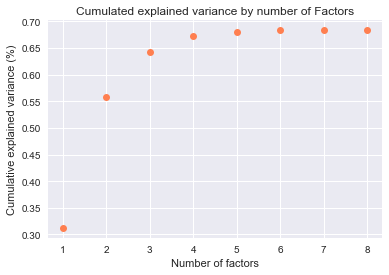

In [24]:
# get cumulated % variance for plotting
cumulated_fa = fa.get_factor_variance().iloc[[2]].values[0]
plt.plot(range(1,9),cumulated_fa, marker = "o", linestyle="", color="coral")
plt.xlabel('Number of factors')
plt.ylabel('Cumulative explained variance (%)')
plt.title('Cumulated explained variance by number of Factors')

## Evaluation FA results
As for PCA, we see that the results are promising in terms of reducing the number of features we could use in a further analysis. We see this by the fact that we can include a number of the new Factors created in the Factor analysis, a number smaller than the original 8 features, and these will capture a large part of the common variance in the original features. <br>
<br>

We can evaluate how many Factors it would be advisable to use for further analysis, using the same techniques as for PCA:<br>
<br>

 - Factors with eigenvalues above 1: From the output above we see that this strategy would advise us to go forward with Factor 1 and 2. <br>
 - Evaluating the Scree plot: By looking at the Scree plot it can be resonable to argue that the bars don't start to level out until after Factor 3, thus supporting that also Factor 3 should be included. <br>
 - Evaluating accumulated explained variance: This plot is different from the plot presented in PCA, in that the accumulated variance explained does not get up to a hundred. Still, if we argue that the goal of the factors is to explain as much of the common variance across the original variables, we can use the same reasoning and look for where the additional factors do not add a lot more explanatory power. By looking at the plot just above we see that it seems to be after Factor 3 that the slope starts to level out. Supporting the conclusion from the Scree plot, that Factor 3 should be included in further analysis. <br>

All in all, based on the Factor Analysis performed above one could argue that moving forward with 3 Factors for further model building is beneficial. As such the method has been successful in reducing the dimensions of our dataset, from 8 to 3 features. <br>

# Last comments

If the purpose in this coursework had been to actually move forward and build a model one would have rerun the PCA and the FA with the number of components/factors that one had found to be appropriate through the analysis above. Moreover, one would also consider which of the reduction techniques which was appropriate for the analysis to be performed or the mode to build. <br>

# References

(1) James, G., Witten, D., & Hastie, T.J. (2014). An Introduction to Statistical Learning with Applications in R. <br>
(2) Factor Analysis: A Short Introduction, Part 1 https://www.theanalysisfactor.com/factor-analysis-1-introduction/ <br>
(3) The Fundamental Difference Between Principal Component Analysis and Factor Analysis https://www.theanalysisfactor.com/the-fundamental-difference-between-principal-component-analysis-and-factor-analysis/ <br>
(4) Summary Report on ANSUR dataset: http://www.openlab.psu.edu/ansur2/ <br>
(5) Factor-analyzer 0.2.3: https://pypi.org/project/factor-analyzer/ <br>
(6) Documentation on sklearn.decomposition.PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html <br>
(7) Ways to choose number of components in PCA: https://www.quora.com/What-is-the-best-way-to-choose-the-number-of-components-in-PCA-during-dimensionality-reduction <br>
(8) How many factors to choose in Factor Analysis?: https://www.theanalysisfactor.com/factor-analysis-how-many-factors/ <br>